In [1]:
#https://www.kaggle.com/datasets/pranavshinde36/india-house-rent-prediction/code

In [2]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler

In [3]:
#https://raw.githubusercontent.com/tirodkarp/eda_practise/refs/heads/main/India_house_rent_prediction.csv

url ="https://raw.githubusercontent.com/tirodkarp/eda_practise/refs/heads/main/India_house_rent_prediction.csv"
df = pd.read_csv(url)
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


In [5]:
df.describe()

,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


In [6]:
df.isna().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [7]:
df.shape

(7691, 10)

In [8]:
df.dtypes

house_type     object
locality       object
city           object
area          float64
beds            int64
bathrooms       int64
balconies       int64
furnishing     object
area_rate     float64
rent          float64
dtype: object

In [9]:
df.columns

Index(['house_type', 'locality', 'city', 'area', 'beds', 'bathrooms',
       'balconies', 'furnishing', 'area_rate', 'rent'],
      dtype='object')

In [10]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [11]:
#iqr for rent inm iven data
q1 = df['rent'].quantile(0.25)
q3 = df['rent'].quantile(0.75)

iqr = q3-q1

upper_limit = q1 - 1.5*iqr
lower_limit = q1 + 1.5*iqr
lower_limit

outliers = df[(df['rent'] <lower_limit) | (df['rent'] > upper_limit)]
print("iqr = ",iqr)
print("upper_limit = ",upper_limit)
print("lower_limit = ",lower_limit)
print("\n-----outliers-------")
print(outliers[['locality','rent']].head())

iqr =  42000.0
upper_limit =  -48000.0
lower_limit =  78000.0

-----outliers-------
        locality      rent
0  Goregaon East  120000.0
1          Powai   40000.0
2        Mundhwa   12000.0
3         Hingna    8000.0
4      Mira Road   15000.0


In [12]:
df['zscore'] = stats.zscore(df['rent'])
z_outliners = df[np.abs(df['zscore']) > 3]
print(z_outliners[['locality','rent']].head())

                  locality       rent
14             Bandra East   350000.0
90   Thanisandra Main Road   400000.0
94         Napean Sea Road   700000.0
175            Bandra West   500000.0
249               Sat Bari  1000000.0


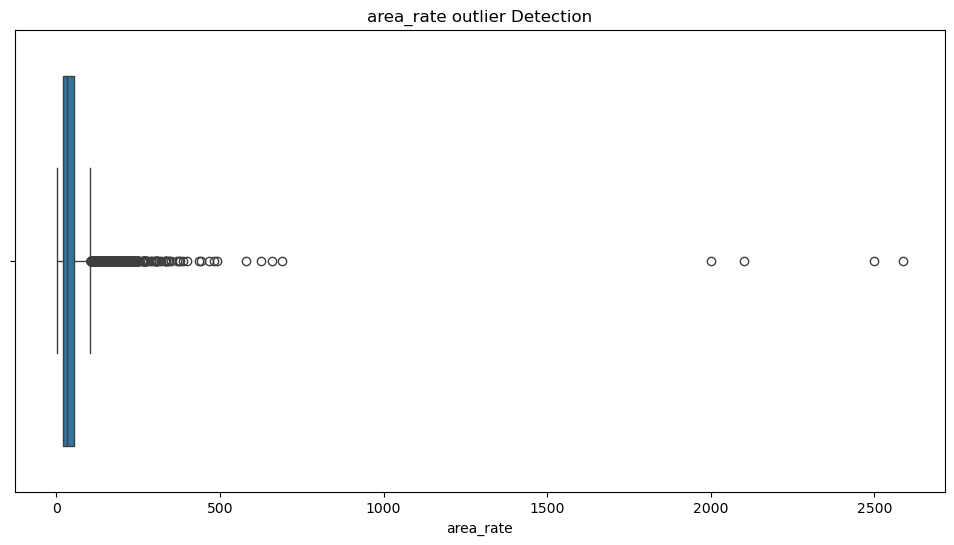

In [42]:
#  Visualization via boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=df["area_rate"])
plt.title("area_rate outlier Detection")
plt.show()

In [43]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,zscore
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,0.669361
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,-0.151879
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,-0.439313
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,-0.480375
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,-0.408516


<h1> encoding</h1>

In [47]:
df_unique = ['furnishing']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

furnishing : ['Semi-Furnished' 'Unfurnished' 'Furnished']


In [49]:
le = LabelEncoder()
df['furnishing'] = le.fit_transform(df['furnishing'])


In [50]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,zscore
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,1,134.0,120000.0,0.669361
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,1,82.0,40000.0,-0.151879
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,2,22.0,12000.0,-0.439313
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,2,8.0,8000.0,-0.480375
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,2,25.0,15000.0,-0.408516


In [51]:
df_unique = ['furnishing']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

furnishing : [1 2 0]


Semi-Furnished' =1
Unfurnished' =2
Furnished'=0

In [52]:
df_unique = ['city']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

city : ['Mumbai' 'Pune' 'Nagpur' 'Bangalore' 'New Delhi']


In [53]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

In [54]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,zscore
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,1,897.0,2,2,0,1,134.0,120000.0,0.669361
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,1,490.0,1,1,0,1,82.0,40000.0,-0.151879
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,4,550.0,1,1,0,2,22.0,12000.0,-0.439313
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,2,1000.0,2,2,0,2,8.0,8000.0,-0.480375
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,1,595.0,1,1,0,2,25.0,15000.0,-0.408516


In [56]:
df_unique = ['city']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

city : [1 4 2 0 3]


'Mumbai'=1, 'Pune'=4 'Nagpur'=2 'Bangalore'=0 'New Delhi'=3

<h1># feature Scaling 
# Standardization (Z-score)</h1>